# Denoising by Delaunay triangulation on zeros

In [1]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from methods.method_delaunay_triangulation import delaunay_triangulation_denoising

In [2]:
# np.random.seed(10)
# signal parameters
SNRin = -20
N = 2**10
# Nsub = 2**12
sbank = SignalBank(N=N, return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax
# s = sbank.signal_mc_crossing_chirps()
s = sbank.signal_mc_dumped_cos()
# s = sbank.signal_mc_synthetic_mixture_5()


signal, noise = add_snr(s,SNRin, complex_noise=False)
# signal = s + noise*np.sqrt(N/Nsub) 

AttributeError: 'SignalBank' object has no attribute 'signal_mc_dumped_cos'

In [ ]:
Nfft = 2*N
g,T = get_round_window(Nfft)
S, F = get_spectrogram(signal, window = g)
F = F[0:N+1]

output = delaunay_triangulation_denoising(signal,
                                return_dic=True,
                                return_comps=True,
                                return_instf=True,
                                grouping = True,
                                # min_group_size=5,
                                ngroups=signal.total_comps,
                                LB = 1.45,
                                )                               

signal_output2, mask, signal_output, instf  = ( output[key] for key in 
                                    ('s_r','mask','comps','instf')
                                    )

In [ ]:
print(10*np.log10((np.sum(s**2))/(np.sum((s-signal_output2)**2))))

-8.506644943964757


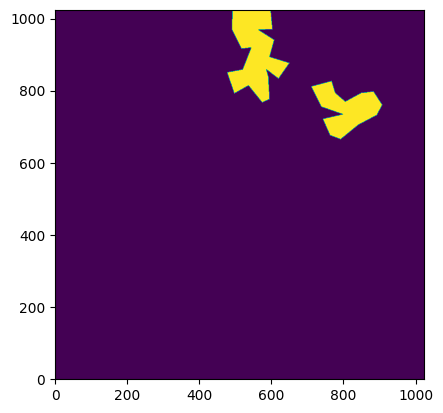

In [ ]:
# Check the mask:
fig, ax = plt.subplots(1,1,)
ax.imshow(mask,origin='lower')

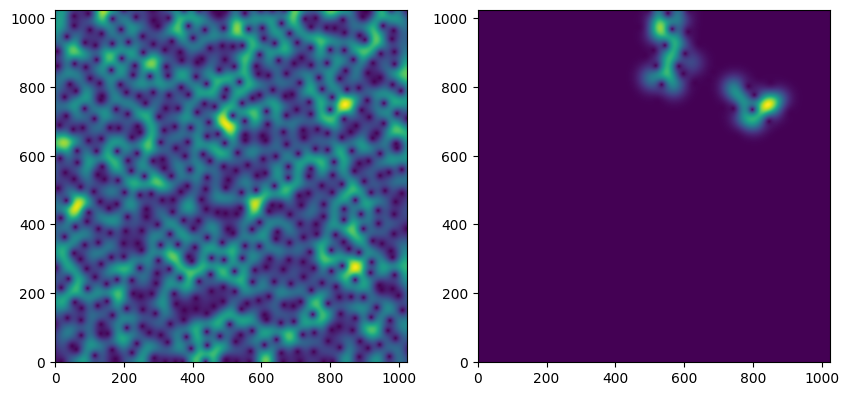

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
S_output, F_output = get_spectrogram(signal_output2, window = g)
F_output = F_output[0:N+1]
ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)

# ax[0].plot(signal.instf[0]*Nfft,'r')
# ax[0].plot(signal.instf[1]*Nfft,'r')
# ax[0].plot(signal.instf[2]*Nfft,'r')
plt.show()

In [ ]:
signal_output = delaunay_triangulation_denoising(signal,
                                return_dic=False,
                                return_comps=True,
                                return_instf=False,
                                grouping = True,
                                # min_group_size=5,
                                ngroups=signal.total_comps,
                                LB = 1.6,
                                )                               

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i], window = g)
    F = F[0:N+1]
    S_output, F_output = get_spectrogram(signal_output[i], window = g)
    F_output = F_output[0:N+1]

    axs[i,0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)

plt.show()

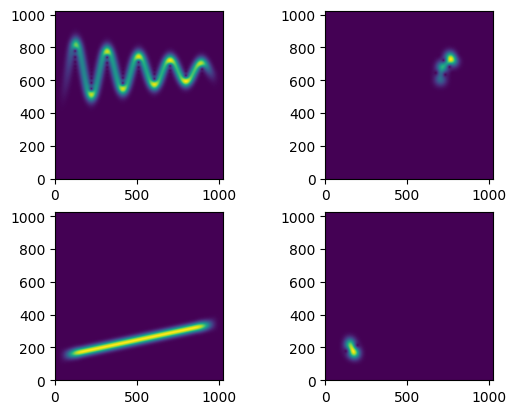

In [ ]:
from benchmark_demo.perf_metrics import order_components, compare_qrf_block, mse

order = order_components(signal_output,signal.comps)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i], window = g)
    F = F[0:N+1]
    S_output, F_output = get_spectrogram(signal_output[order[i]], window = g)
    F_output = F_output[0:N+1]

    axs[i,0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)

# print(compare_qrf_block(signal, [signal_output,]))

2


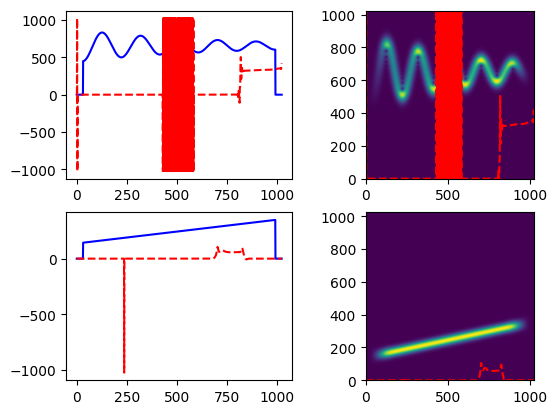

In [ ]:
signal_output = delaunay_triangulation_denoising(signal,
                                return_instf=True,
                                grouping = True,
                                ngroups=signal.total_comps,
                                LB = 1.75,
                                )

order = order_components(signal_output,signal.instf, minormax = 'min', metric = mse)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i], window = g)
    F = F[0:N+1]
    # S_output, F_output = get_spectrogram(signal_output[order[i]], window = g)
    # F_output = F_output[0:N+1]

    axs[i,0].plot(signal.instf[i]*Nfft,'b')
    axs[i,0].plot(signal_output[order[i]]*Nfft,'r--')
    axs[i,1].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].plot(signal_output[order[i]]*Nfft,'r--')
    axs[i,1].set_ylim([0,N])

print(len(signal.instf))